In [5]:
import pandas as pd 
s = pd.Series([0, 1, 2, 3, 4])
s.replace(0, 5,inplace=True)

In [6]:
s

0    5
1    1
2    2
3    3
4    4
dtype: int64

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_concat[df_concat['2013 Rural-urban Continuum Code'].isnull()].reset_index(drop=True))

In [9]:
df=pd.read_csv('wrangled_data.csv')
df.RUCC = df.RUCC.astype('int').astype('str')

def new_RUCC(row):
    if row['RUCC'] in ['4','5']:
        k = '4_or_5'
    elif row['RUCC'] in ['6','7']:
        k = '6_or_7'
    elif row['RUCC'] in ['8','9']:
        k = '8_or_9'
    else:
        k = row['RUCC']
    return k

#print(df.head())
df['new_RUCC']=df.apply(new_RUCC,axis=1)
df['more_than_high_school'] = df['college/associate_degree']+df['bachelors/higher']
df.head()

   height  width
0    40.0     10
1    20.0      9
2     3.4      4
   height  width   area
0    40.0     10  400.0
1    20.0      9  180.0
2     3.4      4   13.6


In [8]:
import pandas as pd

df = pd.DataFrame({'a': ['GOTV', 'Persuasion', 'Likely Supporter', 
                         'GOTV', 'Persuasion', 'Persuasion+GOTV']})

#df.a = pd.Categorical(df.a, 
#                      categories=["Likely Supporter","GOTV","Persuasion","Persuasion+GOTV"],
#                      ordered=True)
print(df)
print(df.a)
print(df.sort_values('a'))

                  a
0              GOTV
1        Persuasion
2  Likely Supporter
3              GOTV
4        Persuasion
5   Persuasion+GOTV
0                GOTV
1          Persuasion
2    Likely Supporter
3                GOTV
4          Persuasion
5     Persuasion+GOTV
Name: a, dtype: object
                  a
0              GOTV
3              GOTV
2  Likely Supporter
1        Persuasion
4        Persuasion
5   Persuasion+GOTV


In [4]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

C:\Users\moein\Miniconda3\envs\newpy36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

print(df.sum(axis=0))
df

x    7.289820
y    4.717626
dtype: float64


,x,y
a,2.236620,2.629449
b,1.089428,0.932942
c,1.348728,0.821882
d,2.615044,0.333352


In [5]:
import pandas as pd
id=[1,2,3,4]
treatment=['A','A','B','B']
gender=['F','M','F','M']
response=[5,3,8,9]
list1=['id','treatment','gender','response']
list2=[id,treatment,gender,response]
A=pd.DataFrame(dict(list(zip(list1,list2))))
A

,gender,id,response,treatment
0,F,1,5,A
1,M,2,3,A
2,F,3,8,B
3,M,4,9,B


          id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9


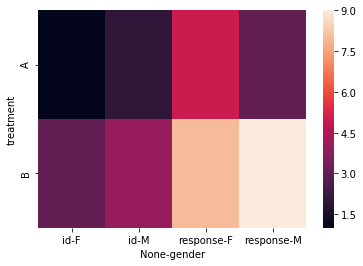

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.close()
B=A.pivot(index='treatment',columns='gender')
print(B)
sns.heatmap(B)
plt.show()

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('wrangled_data.csv')
df.drop(['population_estimate','state','county'],axis=1,inplace=True)
X = df.drop('poverty_percentage',axis=1)
y = df['poverty_percentage']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)


parameters = {'n_estimators':[100],\
             'min_samples_leaf':[14],\
             'max_features':[6]}
forest = RandomForestRegressor(random_state=21)
clf = GridSearchCV(forest,param_grid=parameters,cv=5)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

In [1]:
#formula =  'poverty_percentage~education_index+rural_urban_continuum_code_1+rural_urban_continuum_code_2+rural_urban_continuum_code_3\
#+rural_urban_continuum_code_4+rural_urban_continuum_code_5+rural_urban_continuum_code_6+rural_urban_continuum_code_7\
#+rural_urban_continuum_code_8+ education_index*rural_urban_continuum_code_1 + education_index*rural_urban_continuum_code_2\
#+education_index*rural_urban_continuum_code_3 + education_index*rural_urban_continuum_code_4 + education_index*rural_urban_continuum_code_5\
#+education_index*rural_urban_continuum_code_6 + education_index*rural_urban_continuum_code_7 + education_index*rural_urban_continuum_code_8'

#from statsmodels.formula.api import ols
#model = ols(formula,data=df_extended).fit()
#print(model.summary())

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=3)

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


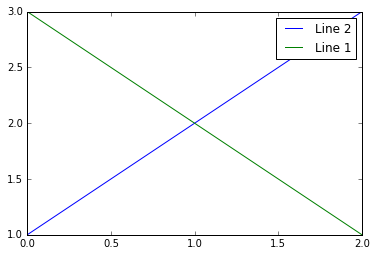

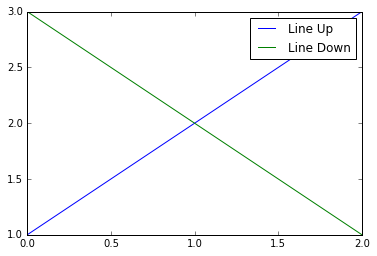

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])
plt.show()

line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
plt.show()

In [12]:
df

,lab,val
0,A,10
1,B,30
2,C,20


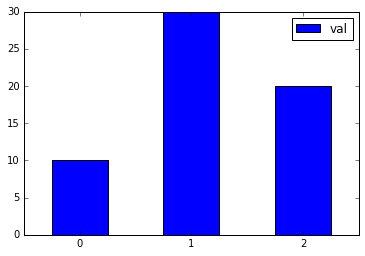

In [13]:
import pandas as pd
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df.plot.bar(rot=0)
plt.show()

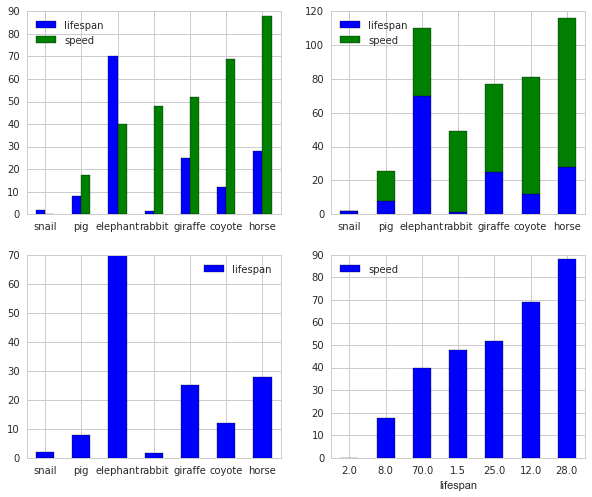

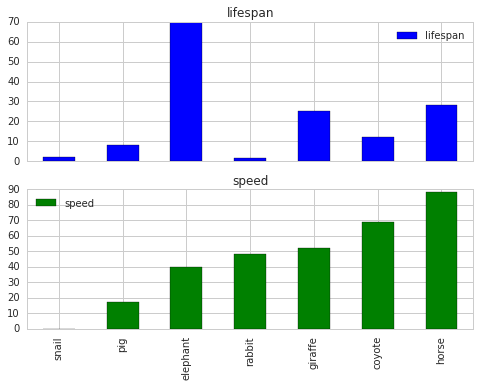

In [90]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,8))
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
df.plot.bar(ax=ax1,rot=0)
df.plot.bar(ax=ax2,rot=0,stacked=True)
df.plot.bar(ax=ax3,y = 'lifespan',rot=0)
df.plot.bar(ax=ax4, x = 'lifespan',rot=0)
plt.show()
df.plot.bar(subplots = True)
plt.show()

In [54]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


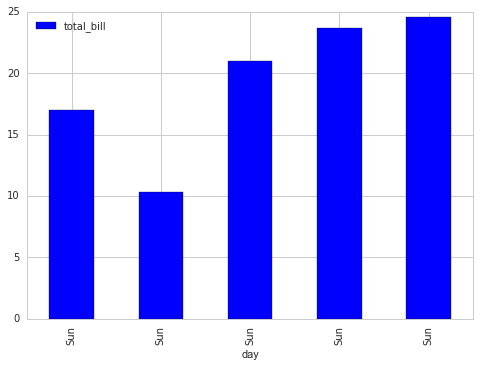

In [73]:
plt.bar(x='day',y='total_bill')
plt.show()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color

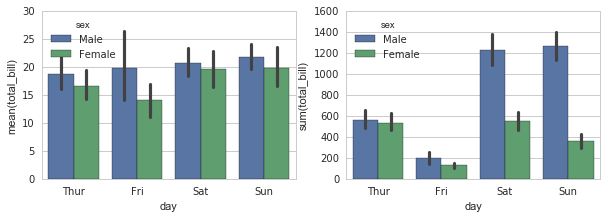

In [72]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
sns.barplot(ax=ax1, x="day", y="total_bill",hue='sex', data=tips)
from numpy import sum
sns.barplot(ax=ax2, x="day", y="total_bill", hue='sex',data=tips, estimator=sum)
plt.show()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color

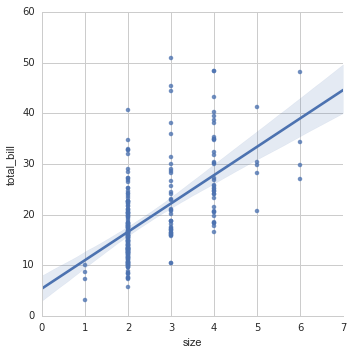

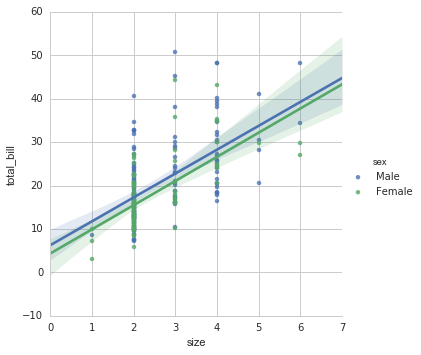

In [116]:
sns.lmplot(x='size',y='total_bill', data=tips)
sns.lmplot(x='size',y='total_bill', hue='sex', data=tips)
plt.show()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


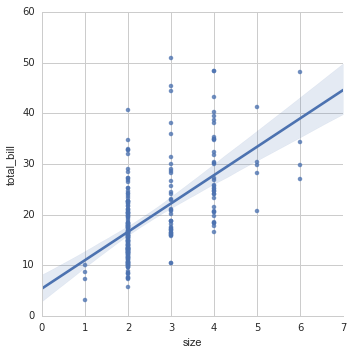

In [77]:
sns.lmplot(x='size',y='total_bill',data=tips)
plt.show()

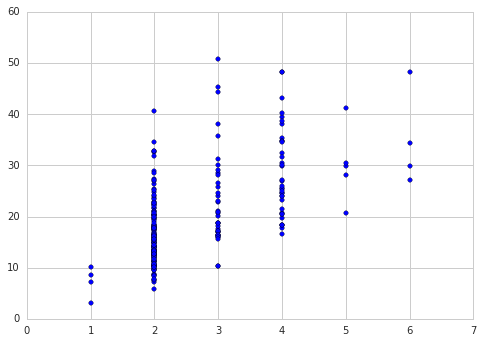

In [80]:
plt.scatter(tips['size'],tips['total_bill'])
plt.show()

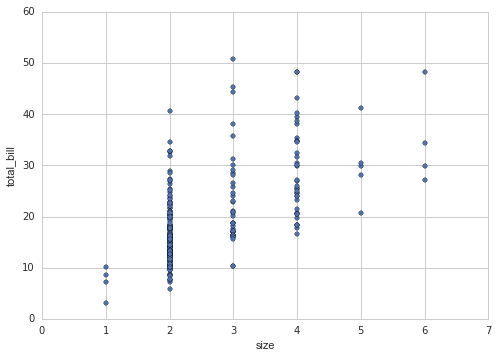

In [100]:
tips.plot(kind='scatter',x='size',y='total_bill')
plt.show()

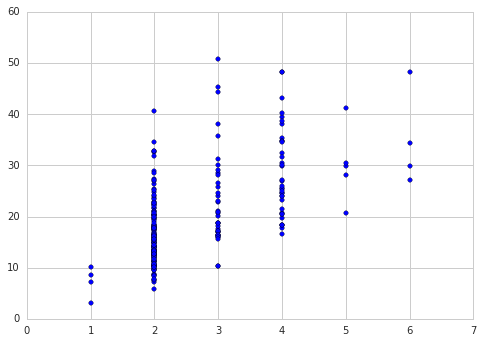

In [91]:
plt.scatter(x='size',y='total_bill',data=tips)
plt.show()

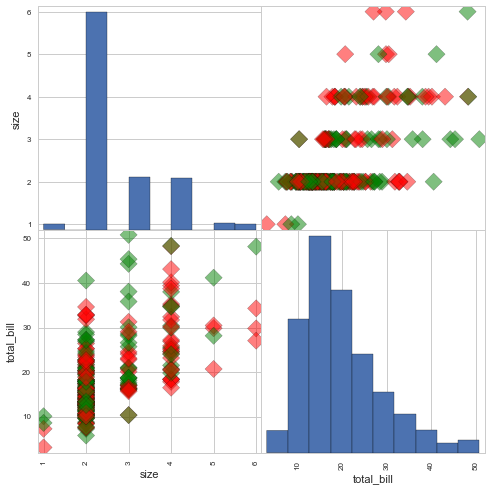

In [112]:
import pandas as pd
c=['green','red']
pd.scatter_matrix(tips.loc[:,['size','total_bill']],c =c,figsize = [8, 8], s=150, marker = 'D')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000040A2D860>,
      dtype=object)

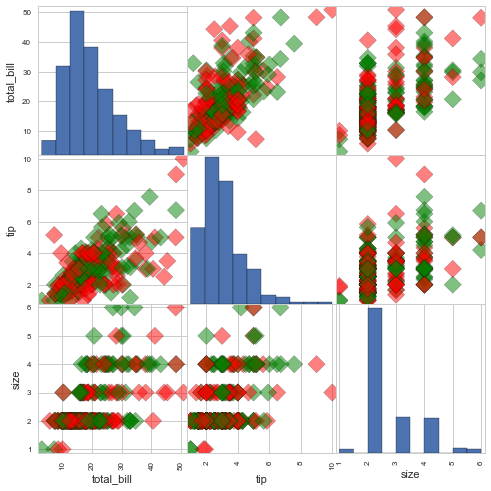

In [115]:
import pandas as pd
c=['red','green']
pd.scatter_matrix(tips,c =c,figsize = [8, 8], s=150, marker = 'D')
#plt.show()

In [113]:
tips.loc[:,['size','total_bill']].head()

,size,total_bill
0,2,16.99
1,3,10.34
2,3,21.01
3,2,23.68
4,4,24.59


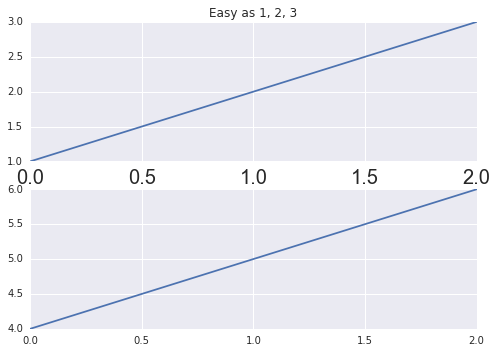

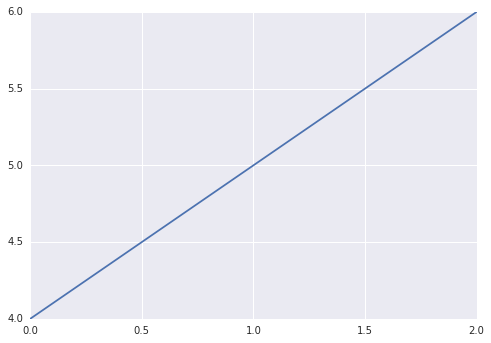

In [7]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.xticks(fontsize=20)
plt.show()

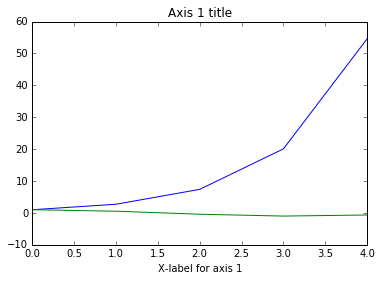

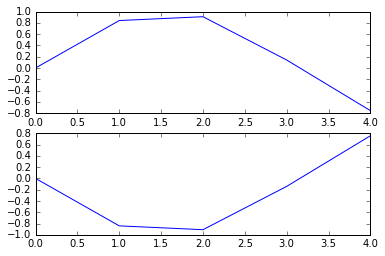

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
y = np.exp(x)
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
ax1.set_title("Axis 1 title")
ax1.set_xlabel("X-label for axis 1")

z = np.sin(x)
fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(x, z)
ax3.plot(x, -z)

w = np.cos(x)
ax1.plot(x, w) # can continue plotting on the first axis
plt.show()

In [5]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [ ]:
# Group bu RUCC and measure the average
df_group = df.groupby('RUCC').mean().loc[:,['high_school_or_less','poverty','unemployment']]

# Plot the average of less than high school, poverty, and unemployment across the nine RUCC
plt.plot(df_group,'--D')
plt.legend(df_group.columns,loc='lower left',bbox_to_anchor=(1,0))
plt.xlabel('RUCC',fontsize = 20)
plt.ylabel('percentage',fontsize = 20)
plt.title('Average percentage of population with high school diploma or less,\n \
poverty and unemployment across nine RUCC',fontsize = 20)
plt.show()

In [20]:
import pandas as pd
#Create a test dataframe
df = pd.DataFrame([
       ['green', 'Chevrolet', 2017],
       ['blue', 'BMW', 2015], 
       ['yellow', 'Lexus', 2018],
])
df.columns = ['color', 'make', 'year']
df

,color,make,year
0,green,Chevrolet,2017
1,blue,BMW,2015
2,yellow,Lexus,2018


In [21]:
from sklearn import preprocessing
make_le = preprocessing.LabelEncoder()
color_le = preprocessing.LabelEncoder()
df['make_le'] = make_le.fit_transform(df.make)
df['color_le'] = make_le.fit_transform(df.color)
df

,color,make,year,make_le,color_le
0,green,Chevrolet,2017,1,1
1,blue,BMW,2015,0,0
2,yellow,Lexus,2018,2,2


In [24]:
for i in df['make_le']:
    print(i)

1
0
2


In [22]:
make_ohe = preprocessing.OneHotEncoder()
color_ohe = preprocessing.OneHotEncoder()
year_ohe = preprocessing.OneHotEncoder(categories='auto')
X_make = make_ohe.fit_transform(df['make_le'].values.reshape(-1,1)).toarray()
X_color = color_ohe.fit_transform(df['color_le'].values.reshape(-1,1)).toarray()
X_year = year_ohe.fit_transform(df['year'].values.reshape(-1,1)).toarray()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categori

In [25]:
import pandas as pd
df_make = pd.DataFrame(X_make,columns = ['make_'+str(int(i)) for i in range(X_make.shape[1])])
df_color = pd.DataFrame(X_color,columns = ['color_'+str(int(i)) for i in range(X_color.shape[1])])
df_year = pd.DataFrame(X_year,columns =['year_'+str(int(i)) for i in df['year']])


,year_2017,year_2015,year_2018
0,0,1,0
1,1,0,0
2,0,0,1


In [26]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 3 columns):
year_2017    3 non-null float64
year_2015    3 non-null float64
year_2018    3 non-null float64
dtypes: float64(3)
memory usage: 96.0 bytes


In [18]:
df = pd.concat([df,df_make,df_color],axis=1)
df

,color,make,year,make_le,color_le,make_0,make_1,make_2,color_0,color_1,color_2
0,green,Chevrolet,2017,1,1,0,1,0,0,1,0
1,blue,BMW,2015,0,0,1,0,0,1,0,0
2,yellow,Lexus,2018,2,2,0,0,1,0,0,1
